In [137]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline 

In [150]:
def pca(x):
    num_data,num_var = x.shape
    #centralize x first
    mean_x = x.mean(axis = 0)
    x = x-mean_x
    #when numebr of feature is smaller than row count
    if num_data >= num_var:
        U, S, V = np.linalg.svd(x)
    else:
        #http://www.cnblogs.com/hanahimi/p/4312175.html
        #紧致技巧
        M = np.dot(x,x.T)
        e,ev = np.linalg.eigh(M)
        tmp = np.dot(x.T,ev)
        V = tmp[::-1]
        S = np.sqrt(e)[::-1]
        for i in range(V.shape[1]):
            V[:,i] /= S
    return V,S,mean_x

In [151]:
def kernel_pca(x,gamma,k):
    #calculate pairwise distance
    sq_dists = pdist(x, metric='sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    #calculate kernel value
    K = np.exp(-gamma*mat_sq_dists)
    
    N = X.shape[0]
    one_N = np.ones((N, N))/N
    #centralize kernel
    K = K-one_N.dot(K)-K.dot(one_N)+one_N.dot(K).dot(one_N)
    
    #calculate e/ev for kernel
    e,ev = np.linalg.eigh(K)
    alphas = np.stack((ev[:,-i] for i in range(1,k+1)),axis = 1)
    lambdas = [e[-i] for i in range(1, k+1)]
    return alphas, lambdas

def kernel_pca_proj(x_new,x,alphas,lambdas,gamma):
    K_new = np.exp(-gamma*np.sum((x-x_new)**2, 1))
    return K_new.dot(alphas / np.sqrt(lambdas))  #normalize alpha

In [152]:
#get data
x, y = make_circles(n_samples=400, factor=.3, noise=.05)

Text(0,0.5,'$x_2$')

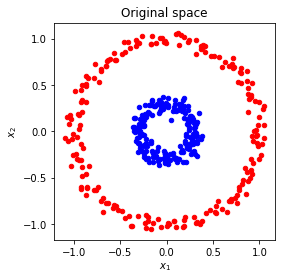

In [153]:
plt.figure()
plt.subplot(1, 1, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(x[reds, 0], x[reds, 1], c="red",
            s=20, edgecolor='red')
plt.scatter(x[blues, 0], x[blues, 1], c="blue",
            s=20, edgecolor='blue')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [178]:
#test pca
v,s,xmean = pca(x)
x_new = np.dot(x - xmean,v.T)

Text(0,0.5,'$x_2nd_comp$')

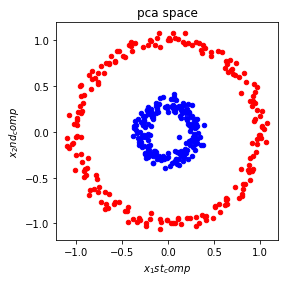

In [180]:
plt.figure()
plt.subplot(1, 1, 1, aspect='equal')
plt.title("pca space")
reds = y == 0
blues = y == 1

plt.scatter(x_new[reds, 0], x_new[reds, 1], c="red",
            s=20, edgecolor='red')
plt.scatter(x_new[blues, 0], x_new[blues, 1], c="blue",
            s=20, edgecolor='blue')
plt.xlabel("$x_1st_comp$")
plt.ylabel("$x_2nd_comp$")

In [182]:
#test kpca
alphas, lambdas = kernel_pca(x,2,2)

In [204]:
x_new = np.array([0,0])
for i in range(400):
    x_mid = kernel_pca_proj(x[i,:],x,alphas,lambdas,2)
    x_new = np.vstack((x_new,x_mid))
x_new = x_new[1:,:]

Text(0,0.5,'$x_2nd_comp$')

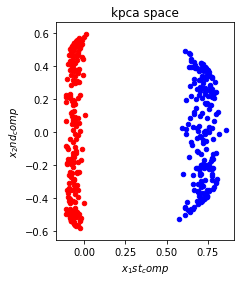

In [207]:
plt.figure()
plt.subplot(1, 1, 1, aspect='equal')
plt.title("kpca space")
reds = y == 0
blues = y == 1

plt.scatter(x_new[reds, 0], x_new[reds, 1], c="red",
            s=20, edgecolor='red')
plt.scatter(x_new[blues, 0], x_new[blues, 1], c="blue",
            s=20, edgecolor='blue')
plt.xlabel("$x_1st_comp$")
plt.ylabel("$x_2nd_comp$")